In [1]:
!jupyter kernelspec list

Available kernels:
  python3    /home/guest/anaconda3/share/jupyter/kernels/python3


In [2]:
!pip install plotly
!pip install wordcloud
!pip install textblob

In [68]:
import sys
!{sys.executable} -m spacy download en

     |████████████████████████████████| 12.0MB 1.0MB/s eta 0:00:01    |███████████████▎                | 5.8MB 1.2MB/s eta 0:00:06
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp37-none-any.whl size=12011740 sha256=eda6e8a69ef4ee66d7a02ed9e4234a501c318454596d93872a9baf3844fdf31e
  Stored in directory: /tmp/pip-ephem-wheel-cache-rpdpbz06/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.0.0
    Uninstalling en-core-web-sm-2.0.0:
      Successfully uninstalled en-core-web-sm-2.0.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/guest/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/home/guest/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [3]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#word count
from collections import Counter

#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

#sentiment analysis
from textblob import TextBlob

#text preprocessing
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /home/guest/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/guest/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!pip install en_core_web_sm-2.2.0.tar.gz

Processing ./en_core_web_sm-2.2.0.tar.gz
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp37-none-any.whl size=12019125 sha256=cbeef3aa9f92c07db842f4cff020c9c8ef9d6769f8c838caca6e6fee55736b17
  Stored in directory: /home/guest/.cache/pip/wheels/86/be/e7/3cc9be674192f3acb09ff089f9b034fcf7dfd1a69bd45e7240
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0


In [7]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in /home/guest/anaconda3/lib/python3.7/site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Topic modeling
# spacy for lemmatization
import spacy;
import en_core_web_sm
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

/home/guest/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [9]:
# read file
df = pd.read_csv("psbb_final.csv")

In [10]:
# drop duplicate rows
df.drop_duplicates(inplace =True)
df.drop_duplicates(subset = ['Text'],inplace =True)

In [11]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time
0,golkar_empat,Pemerintah Siap Kembali Putar Roda Perekonomia...,0,0,#PSBB #NewNormal #indonesianewnormal #Indonesi...,Jakarta,2020-05-27,03-07-55
1,PedroPapakilo,Km 47 arah jakarta padat ada check point #puta...,0,0,#putarbalik #turnback #arusbalik #psbb #Checkp...,Jakarta,2020-05-26,04-16-47
2,PedroPapakilo,TL arah Kalibata dari PGC CONDET CILILITAN PAD...,0,0,#PSBBJakarta #PSBB #psbbbelumdilonggarkan,Jakarta,2020-05-25,10-07-16
3,thediyoon,#mudik dan #pulangkampung terhambat akibat #ps...,0,0,#mudik #pulangkampung #psbb #lebaran #lebaran,Jakarta,2020-05-25,03-46-16
4,thediyoon,#mudik dan #pulangkampung terhambat akibat #ps...,0,0,#mudik #pulangkampung #psbb #lebaran #lebaran,Jakarta,2020-05-25,03-33-10


In [12]:
print('shape:', df.shape)
print('number of tweets:', df['Text'].nunique())
print('number of users:', df['User'].nunique())

print("range:", df['date'].min(),",", df['date'].max())
print("dates:",df['date'].nunique())

shape: (544, 8)
number of tweets: 544
number of users: 353
range: 2020-04-28 , 2020-05-27
dates: 30


In [13]:
# get information about the number of missing values and their percentage
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Text(0.5, 1.0, 'Number of Tweets per day')

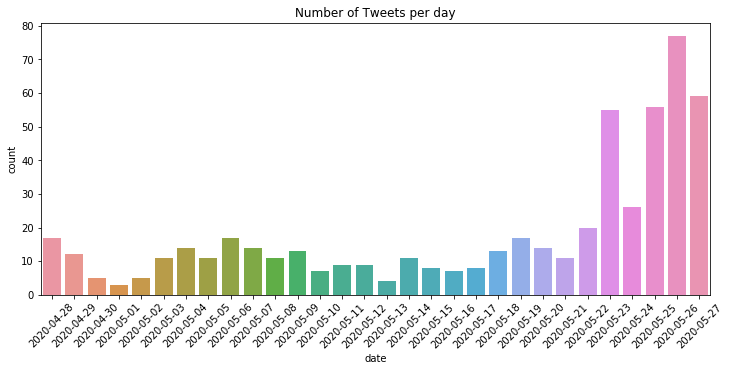

In [14]:
# plot number of tweets everyday
fig = plt.figure(figsize = (12,5))
chart = sns.countplot(df['date'], order = sorted(df['date'].unique()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per day')

In [16]:
# dates = sorted(df['date'].unique())
# fig= plt.figure(figsize=(12,4))
# chart = sns.countplot(df.groupby(['User'])['date'].min(), order = dates)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# chart.set_title('Number of Users per day')

Text(0.5, 1.0, 'Number of Tweets in Different Cities Groups across Dates')

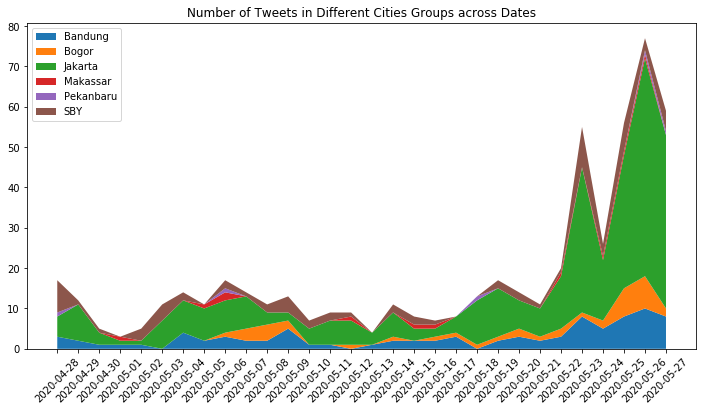

In [17]:
# plot number of tweets everyday in each city 
pivot = pd.pivot_table(df, index=['City'],
                         columns=['date'],
                         values=['Text'], 
                         aggfunc = lambda x: len(x), 
                         fill_value=0)

fig= plt.figure(figsize = (12,6))
plt.stackplot(sorted(df['date'].unique()), pivot.values, labels = pivot.index)
ax = plt.gca()
ax.set_xticks(sorted(df['date'].unique()))
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.title('Number of Tweets in Different Cities Groups across Dates')

In [18]:
# extract data that doesn't contain NAs only
df = df[df['HashTags'].notna()]

In [19]:
# since there's not a lot of twitter before 2020-03-13, we only need data after 2020-03-13
df = df[df['date']>'2020-04-27']

In [20]:
# get rid of all kinds of strange symbols from text
def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    return Text

# remove urls from text
def remove_urls(row):
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    row =  url_pattern.sub(r'', row)
    return row

# remove @accounts (@[A-Za-z0–9]+)|, emojis，#hashtags, com frin text
def removes(row):
    url_pattern = re.compile(r"(\w+:\/\/\S+)|(#(\w+))|(.twitter.com/[A-Za-z0–9]+)")
    row =  url_pattern.sub(r'', row)
    return row

In [21]:
# apply all the preprocess functions
df['text_nlp'] = preprocess(df.Text)
df['text_nlp'] = df['text_nlp'].apply(remove_urls)
df['text_nlp'] = df['text_nlp'].apply(removes)

In [22]:
df.Text[0]

'Pemerintah Siap Kembali Putar Roda Perekonomian Menuju New Normal #PSBB #NewNormal #indonesianewnormal #IndonesiaMaju #GolkarPeduli #GolkarInfo #GolkarUpdate #GolkarNews - beringin NEWS'

In [23]:
df.text_nlp[0]

'Pemerintah Siap Kembali Putar Roda Perekonomian Menuju New Normal         - beringin NEWS'

In [24]:
# Get the lenghth of text and word count
df['text_len'] = df.text_nlp.astype(str).apply(len)
df['word_count'] = df.text_nlp.apply(lambda x: len(str(x).split()))

In [25]:
# fig= plt.figure(figsize = (12,5))
# sns.countplot(df['word_count'])

In [26]:
# Handling Abbreviation
def decontracted(phrase):
    phrase = re.sub(r"j\'gn", " jangan", phrase)   
    phrase = re.sub(r"t\'dk", " tidak", phrase)
    phrase = re.sub(r"\'dm", " direct message", phrase)
    phrase = re.sub(r"\'rmh", " rumah", phrase)
    phrase = re.sub(r"\'ktr", " kantor", phrase)
    phrase = re.sub(r"\'jln", " jalan", phrase)
    phrase = re.sub(r"\'sy", " saya", phrase)
    phrase = re.sub(r"aja", " saja", phrase)
    return phrase

# decontracte words
df.text_nlp = df.text_nlp.apply(lambda x: decontracted(x).lower())

In [27]:
# remove stop words
stop_words = stopwords.words('indonesian')
not_stopwords = {}
common_words = ['sebagai', 'saya', 'nya', 'bahwa', 'dia', 'adalah', 'untuk', 'pada', 'adalah', 'dengan', 
                'mereka', 'menjadi', 'di', 'satu', 'memiliki', 'ini', 'dari', 'oleh', 'hot', 'kata', 
                'tapi', 'apa', 'beberapa', 'adalah', 'itu', 'anda', 'atau', 'memiliki', 'itu', 'dari', 
                'untuk', 'dan', 'sebuah', 'di', 'kami', 'bisa', 'out', 'lainnya', 'yang', 
                'melakukan', 'mereka', 'waktu', 'jika', 'akan', 'bagaimana', 'kata', 'an', 'masing-masing', 'memberitahu', 
                'tidak', 'kumpulan', 'tiga', 'ingin', 'udara', 'baik', 'juga', 'bermain', 'kecil', 'end', 
                'menempatkan', 'rumah', 'baca', 'tangan', 'pelabuhan', 'besar', 'mantra', 'tambahkan', 'bahkan', 'tanah']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
df.text_nlp = df.text_nlp.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))

In [28]:
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
df.text_nlp = df.text_nlp.apply(lambda x: rm_punc.sub(' ', x))
df.text_nlp = df.text_nlp.apply(lambda x: rm_space.sub(' ', x))

In [29]:
df.text_nlp[0]

'pemerintah putar roda perekonomian new normal beringin news'

In [30]:
StayHome = df

In [31]:
# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0, 600)

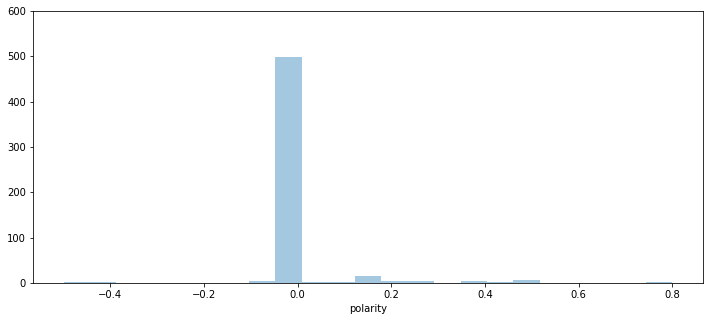

In [32]:
fig = plt.figure(figsize=(12,5))
sns.distplot(df['polarity'],kde = False)
plt.ylim(0, 600)

In [33]:
df[df['polarity']<-0.4]

,User,Text,Retweets,Favorites,HashTags,City,date,time,text_nlp,text_len,word_count,polarity,sentiment
62,firdaus71,"""jalan x ditutup aja, guna menanggulangi orang...",0,0,#COVID19 #PSBB #StayHome #StayHome,SBY,2020-05-08,04-36-24,jalan x ditutup saja menanggulangi orang masu...,218,31,-0.5,negative


In [34]:
# Sentiment 
df.groupby('sentiment').Text.count()

sentiment
negative      8
neutral     498
positive     38
Name: Text, dtype: int64

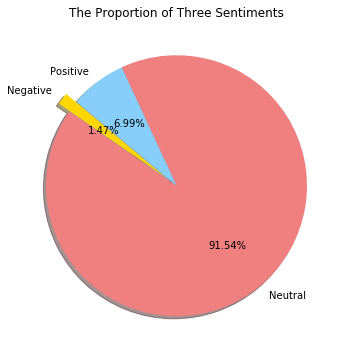

In [35]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = df.groupby('sentiment').Text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

Text(0.5, 1.0, 'Average sentiment of Tweets across Dates')

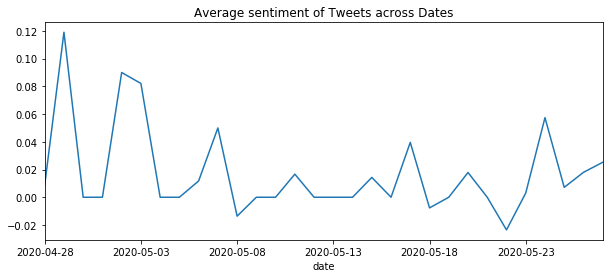

In [36]:
# plot sentiment fluctuation with date
fig, ax1 = plt.subplots(figsize=(10,4))
df.groupby(['date']).mean()['polarity'].plot(kind = 'line')
plt.title('Average sentiment of Tweets across Dates')

In [37]:
# Create word frequency count
num_words = 300
word2count = {}
for i in tqdm(range(len(df['text_nlp']))): 
    for word in df['text_nlp'].iloc[i].split():
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
freq_words = heapq.nlargest(num_words, word2count, key=word2count.get)

100%|██████████| 544/544 [00:00<00:00, 27631.20it/s]


In [38]:
from wordcloud import WordCloud, ImageColorGenerator
from os import path, getcwd
from PIL import Image
d = getcwd()
mask = np.array(Image.open(path.join(d,'download.png')).convert("RGB"))
color = np.array(Image.open(path.join(d,'download.png')).convert("RGB"))

def func(arr):   
    if(arr[2]==0):
        return np.array([255,255,255],dtype="uint8")
    else:
        return arr

mask=np.apply_along_axis(func, 2, mask)
color=np.apply_along_axis(func, 2, color)

/home/guest/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [39]:
red = np.array(Image.open(path.join(d,'download.png')).convert("RGB"))
red=np.apply_along_axis(func, 2, red)

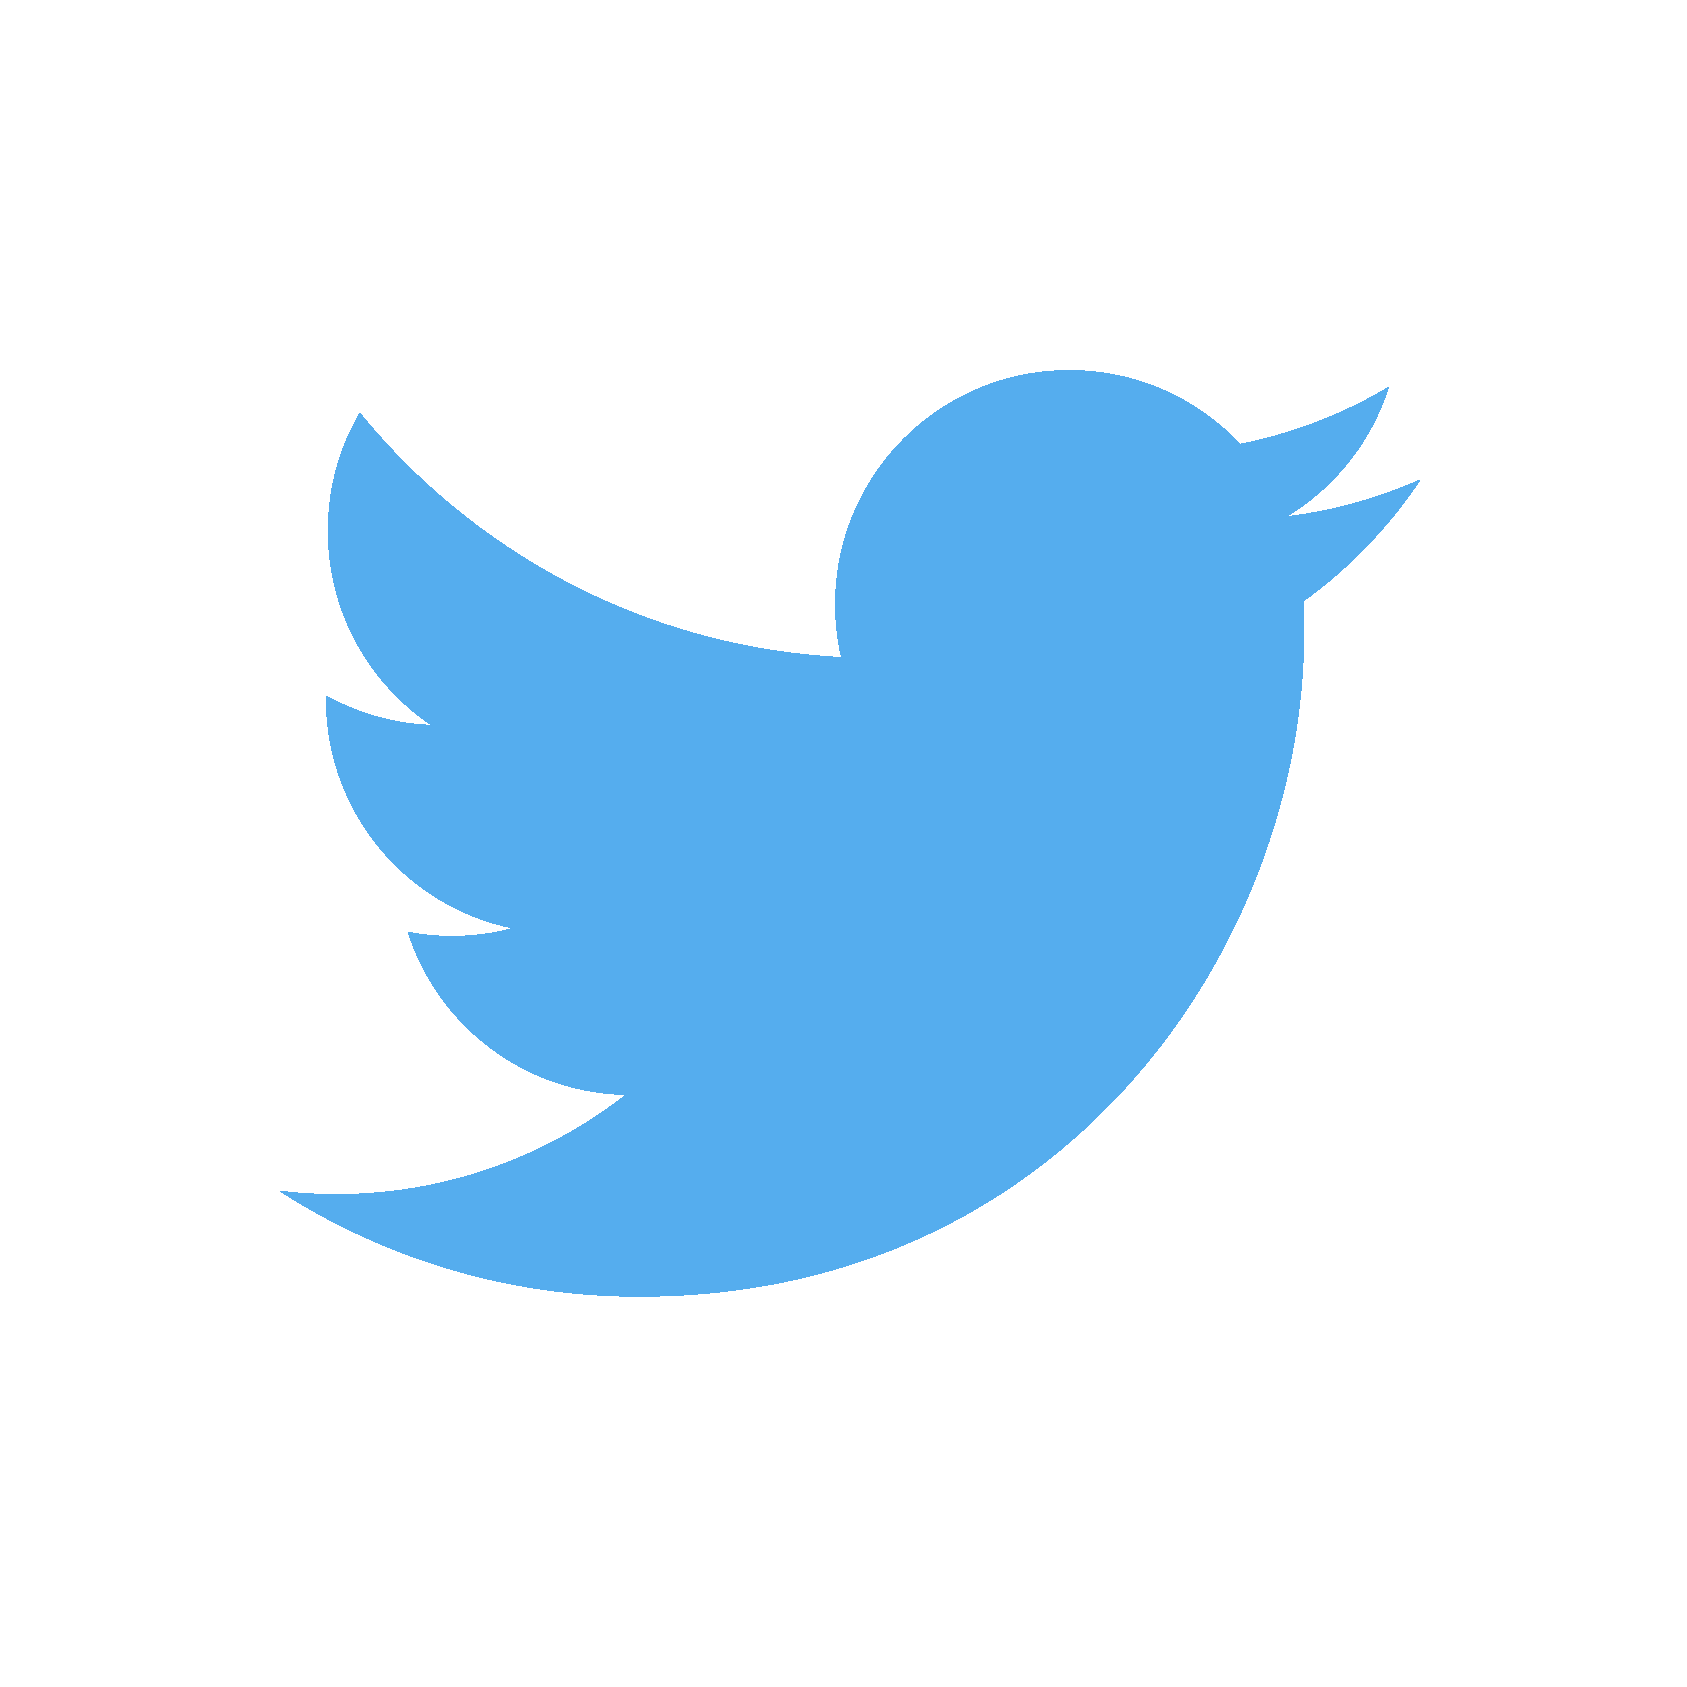

In [40]:
Image.fromarray(mask,"RGB")

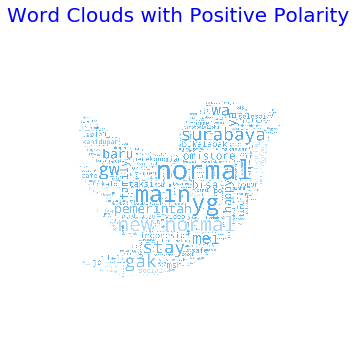

In [41]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white',stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'positive'])))
    # declare our figure  
image_colors = ImageColorGenerator(color)
plt.figure(figsize=(7,6))
# plt.title("Word Clouds with Positive Polarity", fontsize=20,color='#DE2929')
plt.title("Word Clouds with Positive Polarity", fontsize=20,color='#0000ff')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [42]:
wordcloud.to_file('positive_detail.png')

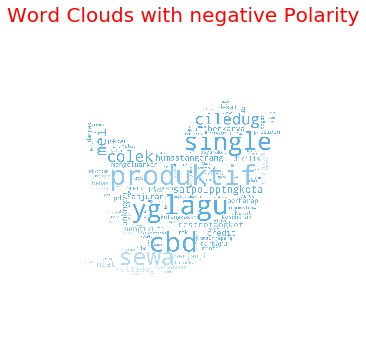

In [43]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white', stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'negative'])))
    # declare our figure  
image_colors = ImageColorGenerator(red)
plt.figure(figsize=(7,6))
# plt.title("Word Clouds with negative Polarity", fontsize=20,color='#DE2929')
plt.title("Word Clouds with negative Polarity", fontsize=20,color='#ff0000')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [44]:
wordcloud.to_file('negative_detail.png')

In [45]:
add_stopwords = ['yang', 'yg', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'amat', 'apalagi', 'bagaimanapun']

# Add meaningless words into stopwords
for i in range(len(add_stopwords)):
    STOPWORDS.add(add_stopwords[i])

In [46]:
# tokenize each sentence into a list of words, removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['text_nlp']))

# Remove Stop and common Words
stopwords = nltk.corpus.stopwords.words('indonesian')
newStopWords =  ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'amat', 'apalagi', 'bagaimanapun']
stopwords.extend(newStopWords)

data_words = [[word for word in doc if word not in stopwords] for doc in data_words]

In [47]:
# restrict words to only noun, adjective, verb and adverb
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

import en_core_web_sm
nlp = en_core_web_sm.load()

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [48]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [49]:
texts

[['perekonomian', 'new', 'normal', 'beringin', 'news'],
 ['point'],
 [],
 ['mend'],
 ['mend'],
 ['mend'],
 ['volume'],
 [],
 [],
 [],
 ['kementerian', 'psbb', 'protokol'],
 [],
 [],
 ['mend'],
 ['mend'],
 ['mend'],
 [],
 ['mend'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['cisaat', 'sukabumi'],
 [],
 [],
 [],
 [],
 [],
 ['family', 'would'],
 [],
 ['normal'],
 ['tanjung', 'batu'],
 ['goal'],
 [],
 ['hhh'],
 [],
 ['paringi'],
 [],
 ['hadit'],
 ['total', 'disuruh', 'putar', 'jabodetabek'],
 ['new', 'normal', 'back', 'normal', 'new', 'komplek'],
 ['sekjen'],
 [],
 ['loh', 'source'],
 ['photo', 'studio'],
 [],
 [],
 [],
 ['new', 'normal'],
 ['pantai', 'ditutup'],
 ['sosial', 'psbb'],
 [],
 [],
 [],
 ['give', 'would', 'jam', 'sore'],
 ['dalan'],
 [],
 ['story'],
 ['ketua', 'area', 'non'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['unfriend'],
 [],
 ['contact', 'wa'],
 [],
 ['setor'],
 [],
 [],
 [],
 [],
 [],
 ['physical', 'distancing', 'shaf', 'dirapatkan'],
 ['main', 'gak', 'rapid', 't

In [50]:
start=24
limit=32
step=2
random = 155

In [51]:
# Write the function to compute coherence values for each model. 
# This could help us choose how many topics should be included into our model.

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=random)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
# compute coherence values for each model
mallet_path = 'mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

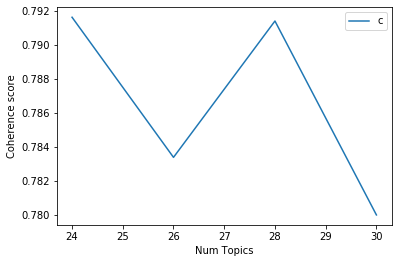

In [53]:
# plot the coherence values when number of topics equals to different numbers
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
# plot the coherence values when number of topics equals to different numbers
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 24  has Coherence Value of 0.7916
Num Topics = 26  has Coherence Value of 0.7834
Num Topics = 28  has Coherence Value of 0.7914
Num Topics = 30  has Coherence Value of 0.78


In [55]:
mallet_path = 'mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                             corpus=corpus,
                                             num_topics=30, 
                                             id2word=id2word,
                                             random_seed = 155)

In [56]:
# Show Topics
model_topics = ldamallet.show_topics(formatted=False)
pprint(sorted(ldamallet.print_topics(num_words=8)))

[(0,
  '0.263*"main" + 0.158*"stay" + 0.105*"family" + 0.053*"mudik" + 0.053*"udah" '
  '+ 0.053*"unfriend" + 0.053*"tangselupdate" + 0.053*"berdoa"'),
 (1,
  '0.167*"magic" + 0.167*"pandemi" + 0.083*"produk" + 0.083*"dina" + '
  '0.083*"contact" + 0.083*"teman" + 0.083*"puse" + 0.083*"duit"'),
 (3,
  '0.300*"contact" + 0.150*"sore" + 0.100*"warkop" + 0.050*"ride" + '
  '0.050*"family" + 0.050*"spesial" + 0.050*"ditentukan" + 0.050*"back"'),
 (6,
  '0.357*"whatsapp" + 0.071*"magic" + 0.071*"depok" + 0.071*"ngapunten" + '
  '0.071*"physical" + 0.071*"disaat" + 0.071*"epidemiologi" + 0.071*"masker"'),
 (7,
  '0.167*"stay" + 0.083*"banget" + 0.083*"anje" + 0.083*"live" + '
  '0.083*"diseluruh" + 0.083*"levithefly" + 0.083*"rasyid" + 0.083*"didalam"'),
 (10,
  '0.059*"inkonsistensi" + 0.059*"ampe" + 0.059*"plan" + 0.059*"prewedding" + '
  '0.059*"real" + 0.059*"photo" + 0.059*"coman" + 0.059*"futsal"'),
 (12,
  '0.143*"msh" + 0.143*"boro" + 0.143*"disimpen" + 0.143*"teue" + '
  '0.143*"wat

In [57]:
topics = pd.DataFrame(sorted(ldamallet.print_topics(num_words=10)))
topics.columns = ['Topic_num','Key_words']
topics.to_csv('30_topics_2.csv',index = False)

In [58]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.780004238546643


In [64]:
topic_names = ['family/mudik/depok', 
               'pandemi/social', 
               'contact/family/special', 
               'saget/punten', 
               'stay/didalam/area', 
               'single/happiness', 
               'seafood/kesehatan', 
               'kesehatan/dampak', 
               'nikmat/lebaran/dampak/product', 
               'kejadian/real/pertikaian/tanggung', 
               'twitter/repost/terbaru/love', 
               'normal/hujan/bandung', 
               'protokol/efektif/pemandangan', 
               'disuruh/masker/check', 
               'home/kesehatan/kementrian', 
               'niat/akhlak', 
               'maen/stream/wa', 
               'dampak/mental/kesehatan', 
               'home/area/order/ongkir', 
               'share/dikaji/online', 
               'berdoa/udah/salurkan', 
               'menggelar/spesial/sore/ride', 
               'dikarenakan/efek/psbb', 
               'live/anje/jam', 
               'sukabumi/siapkan/residence', 
               'check/dalan/polsek/masker', 
               'penjual/sukabumi/diam', 
               'low/banget/wa', 
               'dampak/mudik/safe', 
               'sale/online']
# topic_names = ['cantik/senyum/cantik/manis', 
#                'topeng/wajah/pakai', 
#                'waktu/minggu/ingat/lalu', 
#                'teman/keluarga/bersyukur/tetangga', 
#                'pekerja/perawatan/kesehatan/risiko', 
#                'baca/akhir pekan/latihan/buku', 
#                'rumah/tinggal/tenang/terhubung', 
#                'sosial/menjauhkan/menyelamatkan/dokter', 
#                'cinta/doa/tangan/cuci', 
#                'kasus/kematian/status/ujian', 
#                'tonton/video/bagikan/youtube', 
#                'gratis/tempat/donasi', 
#                'menyebar/ penting/berita/tinggi', 
#                'tinggal/aman/rumah/sehat', 
#                'virus/besar / terjadi/hancurkan', 
#                'kerja/keras/rumah sakit/pasien/tempat tidur', 
#                'anak/virtual/kelas/sekolah', 
#                'karantina/isolasi', 
#                'komunitas/pandemi/perlindungan/pengingat', 
#                'baik/terasa/dunia/saat/foto', 
#                'malam ini/besok/malam', 
#                'orang/mati/sakit', 
#                'kata/pesan/gambar', 
#                'main/bahagia/musik/game', 
#                'tantangan/latihan/segar/udara', 
#                'makanan/makan/rumah/bersih', 
#                'luar biasa/makan malam/masak', 
#                'tampilkan/favori/film', 
#                'pesanan/panggilan/online/pengiriman', 
#                'tutup/bisnis/publik/taman']

In [65]:
topics_docs = []
for m in ldamallet[corpus]:
    topics_docs.append(m)

train_vecs = []
for i in topics_docs:
    topic_vec = [j[1] for j in i]
    train_vecs.append(topic_vec) 

topic_dis = pd.DataFrame(train_vecs,columns=topic_names)
topic_dis.head()

df= pd.concat([df,topic_dis],axis = 1)
df.head(2)

,User,Text,Retweets,Favorites,HashTags,City,date,time,text_nlp,text_len,...,berdoa/udah/salurkan,menggelar/spesial/sore/ride,dikarenakan/efek/psbb,live/anje/jam,sukabumi/siapkan/residence,check/dalan/polsek/masker,penjual/sukabumi/diam,low/banget/wa,dampak/mudik/safe,sale/online
0,golkar_empat,Pemerintah Siap Kembali Putar Roda Perekonomia...,0,0,#PSBB #NewNormal #indonesianewnormal #Indonesi...,Jakarta,2020-05-27,03-07-55,pemerintah putar roda perekonomian new normal ...,89,...,0.030864,0.030864,0.030864,0.030864,0.030864,0.030864,0.045267,0.034979,0.030864,0.030864
1,PedroPapakilo,Km 47 arah jakarta padat ada check point #puta...,0,0,#putarbalik #turnback #arusbalik #psbb #Checkp...,Jakarta,2020-05-26,04-16-47,km 47 arah jakarta padat check point radioelsh...,62,...,0.032680,0.032680,0.032680,0.032680,0.032680,0.032680,0.052288,0.032680,0.032680,0.032680


In [66]:
# Creat all the interested word for analysis
Interesting_words = ['family', 'stay', 'single', 'happiness', 'kesehatan', 'seafood', 'lebaran', 'nikmat', 
                     'twitter', 'terbaru', 'pemandangan', 'masker', 'niat', 'ongkir', 'online', 'berdoa', 
                     'spesial', 'sore', 'live', 'jam', 'penjual', 'sale', 'wa', 'order', 'mudik', 'contact', 
                     'product', 'akhlak', 'stream', 'home', 'share', 'spesial', 'anje', 'safe']
                     
#                      'tv','membaca','video','game','minum','puzzle','pantai','makan','jalan-jalan', 
#                      'tiktok','musik','spotify','bicara','gym','latihan','telepon','zoom', 
#                      'ngobrol','youtube','netflix','nonton','episode','tantangan','challenge', 
#                      'mendengarkan','lagu','taman', 
#                      'tidur','bigo','instagram','instagram','virtual', 
#                      'makan siang','makan pagi','makan malam','masak','bekerja',
#                      'social','teman','keluarga','anak','delivery','layanan', 'drakor']

In [67]:
for col in Interesting_words:
    df[col]=df.text_nlp.apply(lambda x: int(col in str(x)))

In [68]:
# get all the cities
city = list(df['City'].unique())

In [69]:
city.remove(np.nan)

ValueError: list.remove(x): x not in list

In [70]:
# create city vector
for col in city:
    StayHome[col]=StayHome.City.apply(lambda x: int(str(x) == col))
StayHome = StayHome.drop('Bandung',1)
StayHome = StayHome.dropna()

In [71]:
# create polarity score and subjectivity score
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

StayHome['Text'] = StayHome['Text'].apply(str)
StayHome['polarity'] = StayHome['Text'].apply(pol)
StayHome['subjectivity'] = StayHome['Text'].apply(sub)

In [72]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [73]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [77]:
X = StayHome.drop(['User', 'Text', 'Retweets', 'Favorites', 'HashTags','date','City',
       'time', 'text_nlp', 'text_len', 'word_count','polarity','subjectivity', 'sentiment'], 1)
Y = StayHome['polarity']

In [78]:
# train test split
X_test,X_train,y_test,y_train=train_test_split(X,Y, test_size=0.3, random_state=31)

In [79]:
# run lassocv
lasso = LassoCV(cv=10, random_state=31)
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=31, selection='cyclic',
        tol=0.0001, verbose=False)

In [80]:
# predict y
Y_pred = lasso.predict(X_test)
Y_pred

array([0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217532,
       0.01217532, 0.01217532, 0.01217532, 0.01217532, 0.01217

In [81]:
# performance
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print(train_score)
print(test_score)

0.0
-0.00032438994802208576


In [82]:
# create a dictionary with feature and coeficient
coef_dict = dict(zip(list(X.columns),list(list(lasso.coef_))))
# rank feature by coeficient value
import operator
sorted_importance = sorted(coef_dict.items(), key=operator.itemgetter(1))
sorted_importance

[('Jakarta', 0.0),
 ('Pekanbaru', -0.0),
 ('Bogor', 0.0),
 ('Makassar', -0.0),
 ('SBY', 2.3253713414881942e-17)]

In [89]:
df.columns[13:43]
df.iloc[:,13:43].mean().values

array([0.03334569, 0.03329037, 0.03335005, 0.03341851, 0.03327175,
       0.03341585, 0.03332219, 0.03326148, 0.0333009 , 0.03340031,
       0.03335042, 0.03350457, 0.03322657, 0.03333408, 0.03333421,
       0.03334829, 0.03329282, 0.03323562, 0.03326113, 0.03329149,
       0.03324111, 0.03326469, 0.03326912, 0.03339543, 0.03332042,
       0.03338891, 0.0335046 , 0.03334573, 0.03328234, 0.03343133])

In [90]:
topic_list = df.columns[13:43]
topic_mean = df.iloc[:,13:43].mean().values

for i in range(len(topic_list)):
    df[i] = np.where(df[topic_list[i]] > 0.03,1,0)
    
topic_polarity = list()
for i in range(30):
    topic_polarity.append(df[df[i]==1]['polarity'].mean())
    
topic_polarity = pd.DataFrame({'Topics':topic_list,'Polarity':topic_polarity})
topic_polarity.sort_values(by = ['Polarity'],ascending=False)

,Topics,Polarity
17,dampak/mental/kesehatan,0.016400
10,twitter/repost/terbaru/love,0.016370
25,check/dalan/polsek/masker,0.016370
19,share/dikaji/online,0.016370
14,home/kesehatan/kementrian,0.016370
8,nikmat/lebaran/dampak/product,0.016370
15,niat/akhlak,0.016310
20,berdoa/udah/salurkan,0.014977
13,disuruh/masker/check,0.014977
0,family/mudik/depok,0.014977


In [91]:
# count how much time each topic is discussed in each city
topic_cities = df.groupby(['City']).sum().iloc[:,-30:].transpose()
topic_cities

City,Bandung,Bogor,Jakarta,Makassar,Pekanbaru,SBY
0,87,40,326,11,5,70
1,87,41,327,11,5,70
2,87,40,327,11,5,71
3,87,40,328,11,5,70
4,87,40,327,11,5,70
5,87,41,326,11,5,70
6,87,40,327,11,5,71
7,87,41,327,11,5,71
8,87,40,328,11,5,71
9,87,40,327,11,5,70


In [92]:
df = df.dropna(subset = ['text_nlp'])

In [93]:
specail_words = ['kesehatan', 'mental', 'terbaru', 'masker', 'online', 'home', 'nikmat', 'lebaran', 'product', 
                 'single', 'happiness', 'sore', 'stay', 'order', 'sale', 'niat', 'berdoa', 'salurkan', 'family', 
                 'pemandangan', 'live']
#                  'video','netflix','watch','episode','movie',
#                  'gym','exercise','workout','air','fresh',
#                  'listen','music','song',
#                  'sleeping',
#                  'prayer',
#                  'reading','book',
#                  'game',
#                  'instagram',
#                  'phone','zoom','virtual','message',
#                  'eat','lunch','breakfast','dinner','cooking',
#                  'friends','friend','family','neighbor',
#                  'delivery',
#                  'drinking','wine']
avg_polarity = list()
num_texts = list()
for word in specail_words:
    avg_polarity.append(df[df['text_nlp'].str.match(word)]['polarity'].mean())
    num_texts.append(len(df[df['text_nlp'].str.match(word)]))

In [107]:
activity = pd.DataFrame()
activity['activity'] = specail_words
activity['avg_polarity'] = avg_polarity
activity['num_texts'] = num_texts
activity= activity.sort_values(by = ['num_texts'],ascending = True)
activity.reset_index(inplace = True)
activity.drop('index',axis = 1,inplace = True)

In [108]:
# activity['avg_polarity']
activity

,activity,avg_polarity,num_texts
0,kesehatan,NaN,0
1,family,NaN,0
2,berdoa,NaN,0
3,sale,NaN,0
4,order,NaN,0
5,stay,NaN,0
6,sore,NaN,0
7,pemandangan,NaN,0
8,single,NaN,0
9,happiness,NaN,0


In [109]:
positive = activity[activity['avg_polarity']>0.01].index
mild = activity[(activity['avg_polarity']>=0) &(activity['avg_polarity']<=0.01)].index

Text(0.5, 1.0, 'The average polarity of all Tweets containing a keyword')

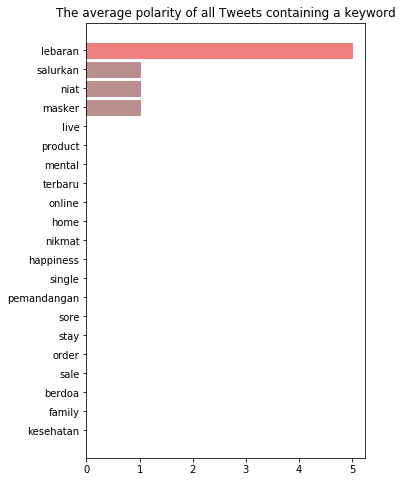

In [110]:
fig, ax = plt.subplots(figsize=(5,8))
barlist =plt.barh(range(len(activity['num_texts'])), activity['num_texts'],color = 'grey')
ax.set_yticks(range(len(activity['num_texts'])))
ax.set_yticklabels(activity['activity'])
plt.rc('xtick', labelsize=10) 
for word in positive:
    barlist[word].set_color('lightcoral')
for word in mild:
    barlist[word].set_color('rosybrown')
plt.title('The average polarity of all Tweets containing a keyword')